# Data Exploration

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder


from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_columns', 50)

In [2]:
DATA_PATH = "../data/waterPollution.csv"


In [3]:
data = pd.read_csv(DATA_PATH)


In [4]:
data


,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.063310,FRDR609,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.046733,FRFR238,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,132.859000,FRFR238,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,11.578376,FRFR327C,France,122.299437,30.831906,71176346.0,2.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,0.206800,ES014MSPFES-014-NR-038-000-02-02,Spain,93.677197,15.047884,50941692.0,4.0,-40055.250,0.729194,87.158924,4.363288,1.464509e+12,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.092466,FRHR239,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19996,RW,EEA_3131-01-9,total,water,%,2009,2009-01--2009-12,89.908300,FRHR239,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19997,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,18.901608,FRHR241,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19998,RW,EEA_3164-08-7,total,water,{massRatio},2009,2009-01--2009-12,307.307000,FRHR241,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parameterWaterBodyCategory                   20000 non-null  object 
 1   observedPropertyDeterminandCode              20000 non-null  object 
 2   procedureAnalysedFraction                    20000 non-null  object 
 3   procedureAnalysedMedia                       20000 non-null  object 
 4   resultUom                                    20000 non-null  object 
 5   phenomenonTimeReferenceYear                  20000 non-null  int64  
 6   parameterSamplingPeriod                      20000 non-null  object 
 7   resultMeanValue                              20000 non-null  float64
 8   waterBodyIdentifier                          20000 non-null  object 
 9   Country                                      20000 non-null  object 
 10

In [6]:
data.describe()

,phenomenonTimeReferenceYear,resultMeanValue,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
count,20000.000000,20000.000000,19893.000000,19893.000000,1.989300e+04,20000.000000,19893.000000,19893.000000,19893.000000,19893.000000,1.989300e+04,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000
mean,2008.998700,34.444639,149.895102,26.227472,4.919348e+07,0.141400,114206.842878,0.130027,14.859312,4.652609,2.286783e+12,32.166075,7.663619,3.196126,23.519892,18.903705,11.206789,0.159449,2.073875,1.302482,23.312787
std,1.917859,174.643233,75.994558,6.790095,2.469506e+07,1.922314,144682.517527,0.260679,31.565912,3.444092,9.318293e+11,11.326430,3.279468,1.130070,6.551350,4.252571,4.901386,0.731725,3.013117,3.656386,5.958540
min,1991.000000,0.000015,14.548292,3.875411,5.300380e+05,0.000000,-83749.750000,0.000000,0.000000,1.064468,2.887150e+10,12.780000,2.200000,1.380000,0.000000,5.000000,1.450000,0.000000,0.000000,0.000000,0.760000
25%,2008.000000,0.114100,122.299437,23.733280,2.586796e+07,0.000000,21256.750000,0.005718,0.000000,4.363288,1.464509e+12,30.000000,5.440000,3.000000,17.700000,18.900000,9.000000,0.000000,0.000000,0.000000,22.260000
50%,2009.000000,2.000000,122.299437,30.831906,5.094169e+07,0.000000,75808.375000,0.005718,0.000000,4.457840,2.806036e+12,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,0.000000,22.260000
75%,2009.000000,10.975625,137.976566,30.831906,7.117635e+07,0.000000,75808.375000,0.032407,0.000000,4.457840,2.806036e+12,32.000000,10.000000,3.000000,26.000000,20.000000,12.400000,0.000000,2.000000,2.700000,27.250000
max,2017.000000,14108.000000,511.475928,38.767234,7.117635e+07,100.000000,582211.000000,0.729194,87.158924,25.982190,3.781699e+12,62.300000,21.400000,9.200000,44.050000,37.830000,22.900000,6.000000,17.210000,30.460000,47.830000


In [7]:
data.isna().sum()


parameterWaterBodyCategory                       0
observedPropertyDeterminandCode                  0
procedureAnalysedFraction                        0
procedureAnalysedMedia                           0
resultUom                                        0
phenomenonTimeReferenceYear                      0
parameterSamplingPeriod                          0
resultMeanValue                                  0
waterBodyIdentifier                              0
Country                                          0
PopulationDensity                              107
TerraMarineProtected_2016_2018                 107
TouristMean_1990_2020                          107
VenueCount                                       0
netMigration_2011_2018                         107
droughts_floods_temperature                    107
literacyRate_2010_2018                         107
combustibleRenewables_2009_2014                107
gdp                                            107
composition_food_organic_waste_

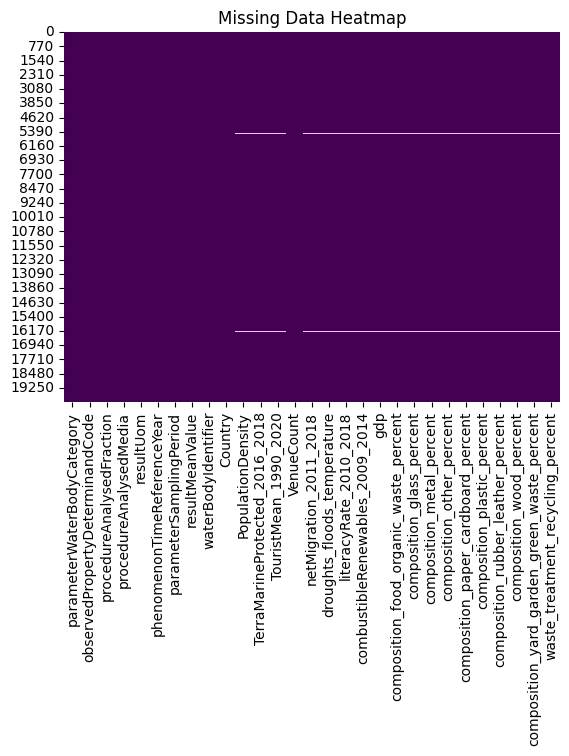

In [8]:
sns.heatmap(data.isna(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [9]:
data.dropna(axis=0,inplace=True)


In [10]:
columns = ("parameterWaterBodyCategory","observedPropertyDeterminandCode","procedureAnalysedFraction","procedureAnalysedMedia","resultUom","parameterSamplingPeriod","waterBodyIdentifier","Country")
for i in columns:
  le = LabelEncoder()
  data[i] = le.fit_transform(data[i])

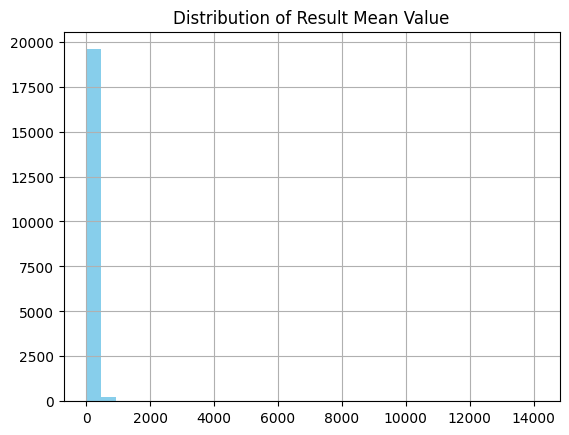

In [11]:
data["resultMeanValue"].hist(bins=30, color="skyblue")
plt.title("Distribution of Result Mean Value")
plt.show()


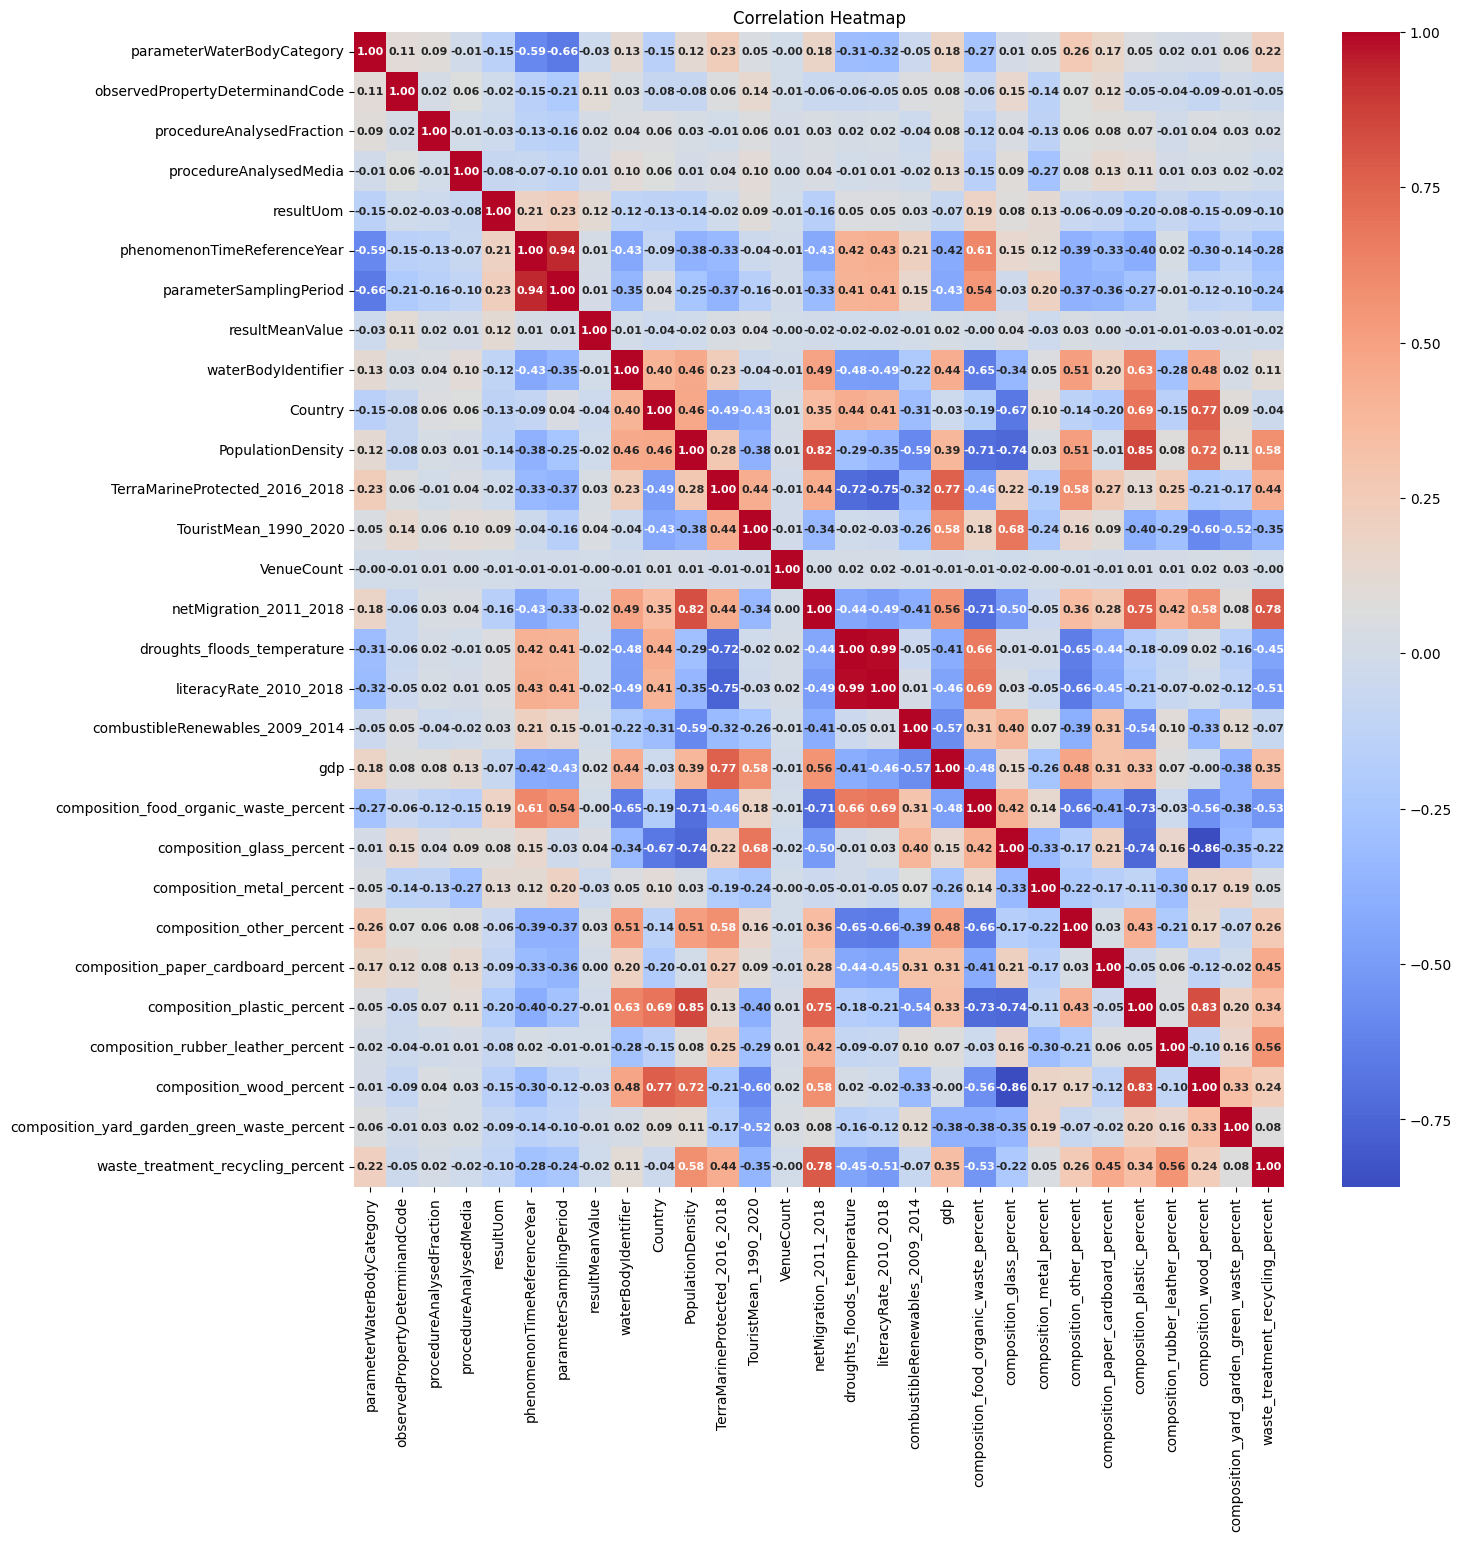

In [12]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 8, "weight": "bold"})
plt.title("Correlation Heatmap")
plt.show()

In [13]:
waste_features = [
    'composition_food_organic_waste_percent',
    'composition_glass_percent',
    'composition_metal_percent',
    'composition_other_percent',
    'composition_paper_cardboard_percent',
    'composition_plastic_percent',
    'composition_rubber_leather_percent',
    'composition_wood_percent',
    'composition_yard_garden_green_waste_percent'
]




if 'gdp' in data.columns and 'literacyRate_2010_2018' in data.columns:
    data['Development_Index'] = data['gdp'] * data['literacyRate_2010_2018']


data['Waste_Composition_Variability'] = data[waste_features].std(axis=1)
# List of features to drop
features_to_drop = [
    'parameterWaterBodyCategory', 'observedPropertyDeterminandCode',
    'procedureAnalysedFraction', 'procedureAnalysedMedia', 'resultUom',
    'phenomenonTimeReferenceYear', 'parameterSamplingPeriod', 'waterBodyIdentifier',
    'Country',
    'TouristMean_1990_2020', 'VenueCount', 'netMigration_2011_2018',
    'droughts_floods_temperature', 'combustibleRenewables_2009_2014', 'gdp',
    'literacyRate_2010_2018', 'TerraMarineProtected_2016_2018'
]

# Drop the columns from the dataset if they exist
data = data.drop(columns=[col for col in features_to_drop if col in data.columns])

# Now calculate the Waste Index with the proposed formula
data['Waste_Index'] = (data[waste_features].max(axis=1) + data['composition_other_percent']) / data['waste_treatment_recycling_percent']

data = data.drop(columns=[col for col in waste_features if col in data.columns])



data=data.drop(columns=['Waste_Composition_Variability', 'waste_treatment_recycling_percent'])



data.head(50)


,resultMeanValue,PopulationDensity,Development_Index,Waste_Index
0,0.063310,122.299437,0.000000e+00,2.605571
1,0.046733,122.299437,0.000000e+00,2.605571
2,132.859000,122.299437,0.000000e+00,2.605571
3,11.578376,122.299437,0.000000e+00,2.605571
4,0.206800,93.677197,1.276450e+14,3.741093
5,2.477792,93.677197,1.276450e+14,3.741093
6,0.013300,93.677197,1.276450e+14,3.741093
7,165.232000,122.299437,0.000000e+00,2.605571
8,80.983300,122.299437,0.000000e+00,2.605571
9,86.659400,122.299437,0.000000e+00,2.605571


In [14]:
data = data.dropna()

In [15]:
data.shape

(19893, 4)

In [16]:
data.columns

Index(['resultMeanValue', 'PopulationDensity', 'Development_Index',
       'Waste_Index'],
      dtype='object')

In [17]:
x = data.drop(["resultMeanValue"],axis = 1)
y = data["resultMeanValue"].values

<Axes: >

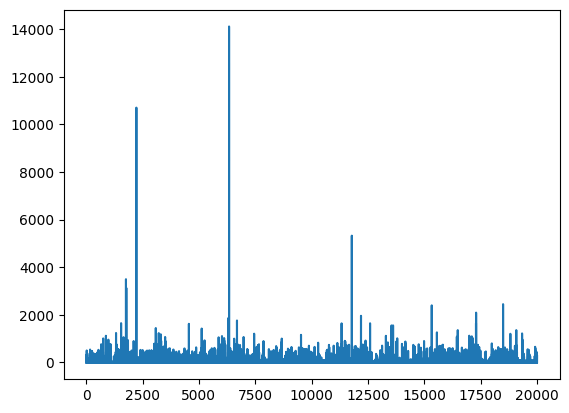

In [18]:
data["resultMeanValue"].plot()


In [19]:
x

,PopulationDensity,Development_Index,Waste_Index
0,122.299437,0.000000e+00,2.605571
1,122.299437,0.000000e+00,2.605571
2,122.299437,0.000000e+00,2.605571
3,122.299437,0.000000e+00,2.605571
4,93.677197,1.276450e+14,3.741093
...,...,...,...
19995,122.299437,0.000000e+00,2.605571
19996,122.299437,0.000000e+00,2.605571
19997,122.299437,0.000000e+00,2.605571
19998,122.299437,0.000000e+00,2.605571


In [20]:
x.shape

(19893, 3)

In [21]:
x.columns

Index(['PopulationDensity', 'Development_Index', 'Waste_Index'], dtype='object')

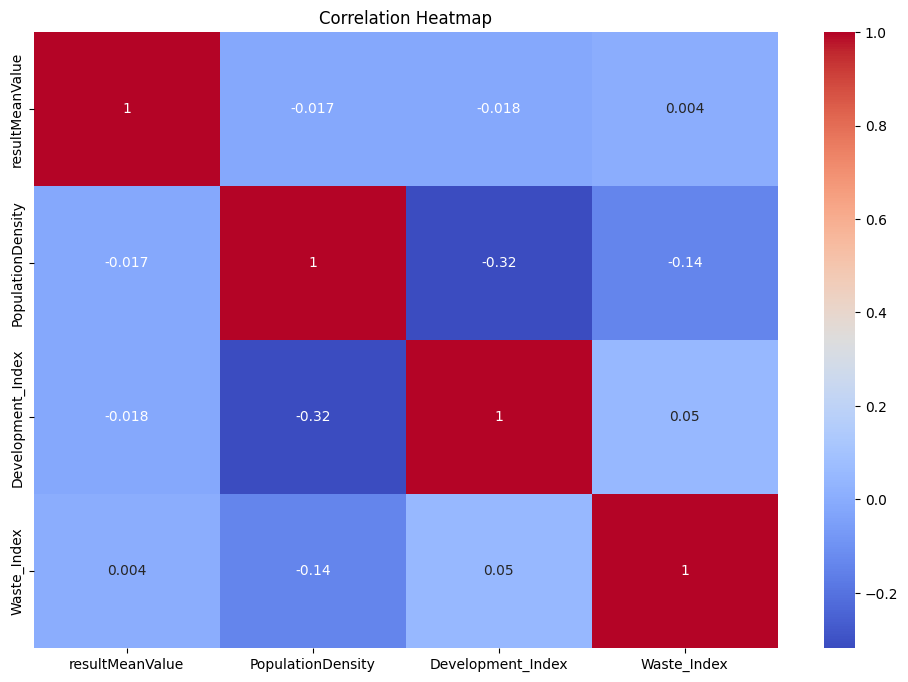

In [22]:
corr_matrix = data.corr()

# Plot heatmap for visual inspection
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [23]:
processed_data = x.copy()
processed_data["target"] = y
processed_data.to_csv("../data/processed_data.csv", index=False)